In [1]:
#==============================================================================
# Import modules
#==============================================================================

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [2]:
# Read CSV
data = pd.read_csv("train.csv")

## Visualization

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   radiation_level   2489 non-null   float64
 1   pressure          2489 non-null   float64
 2   alien_prob        2489 non-null   float64
 3   flare_prob        2489 non-null   float64
 4   growth_potential  1946 non-null   float64
 5   h2o               2489 non-null   int64  
 6   target            2489 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 136.2+ KB


In [4]:
data.describe()

,radiation_level,pressure,alien_prob,flare_prob,growth_potential,h2o
count,2489.000000,2489.000000,2489.000000,2489.000000,1946.000000,2489.000000
mean,65.316494,0.661131,4.331139,13.306367,3.724588,0.519084
std,31.624861,0.256734,5.436262,7.455351,0.888859,0.499736
min,10.149000,-0.025949,-21.832000,1.755000,0.646000,0.000000
25%,44.310000,0.498000,1.500000,8.420000,3.100000,0.000000
50%,65.200000,0.640000,4.233000,12.100000,3.557000,1.000000
75%,79.640000,0.821000,7.427000,16.150000,4.300000,1.000000
max,361.150000,1.800000,19.312000,84.400000,7.652000,1.000000


In [5]:
print(data.isnull().sum())

radiation_level       0
pressure              0
alien_prob            0
flare_prob            0
growth_potential    543
h2o                   0
target                0
dtype: int64


Growth Potential hai Values Missing in train data and also in test CSV

In [6]:
len(data)

2489

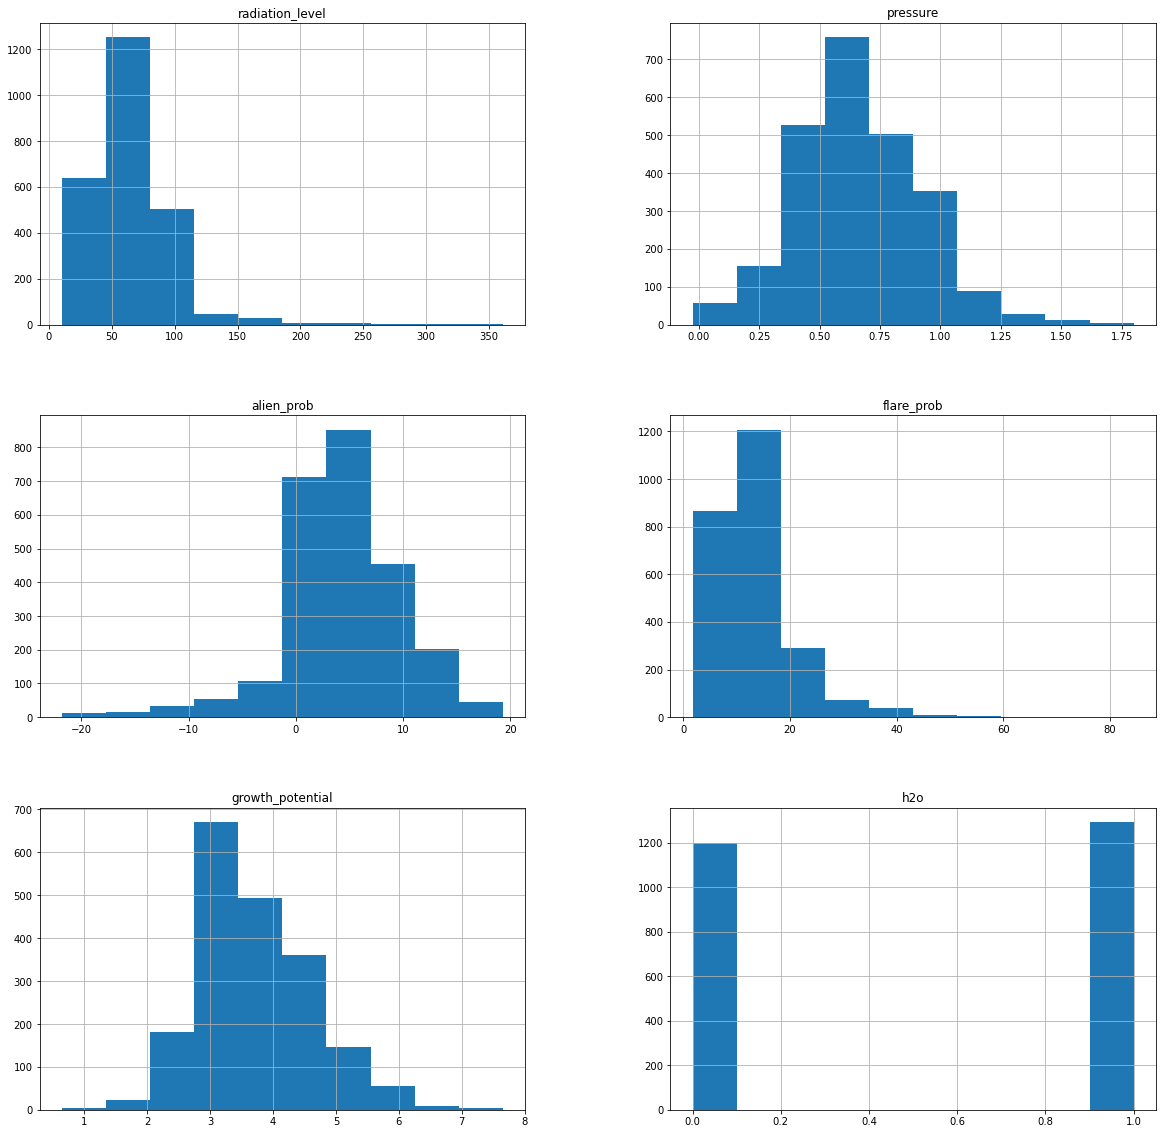

In [7]:
data.hist(figsize=(20,20))
plt.show()

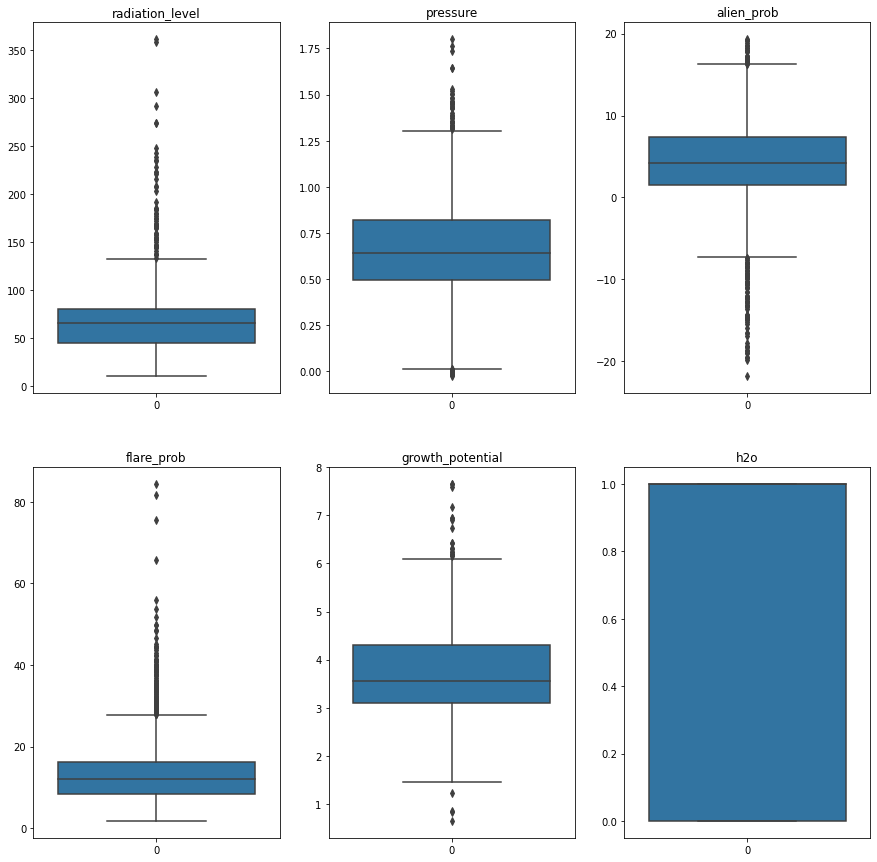

In [8]:
# Box Plots of the Columns
fig, axs = plt.subplots(2, 3,figsize=(15,15))
row = 0
col = 0
for x in axs:
    row_position = 0
    if row == 0:
        col = 0
    else:
        col += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[0])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[1])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[2])
    row += 1

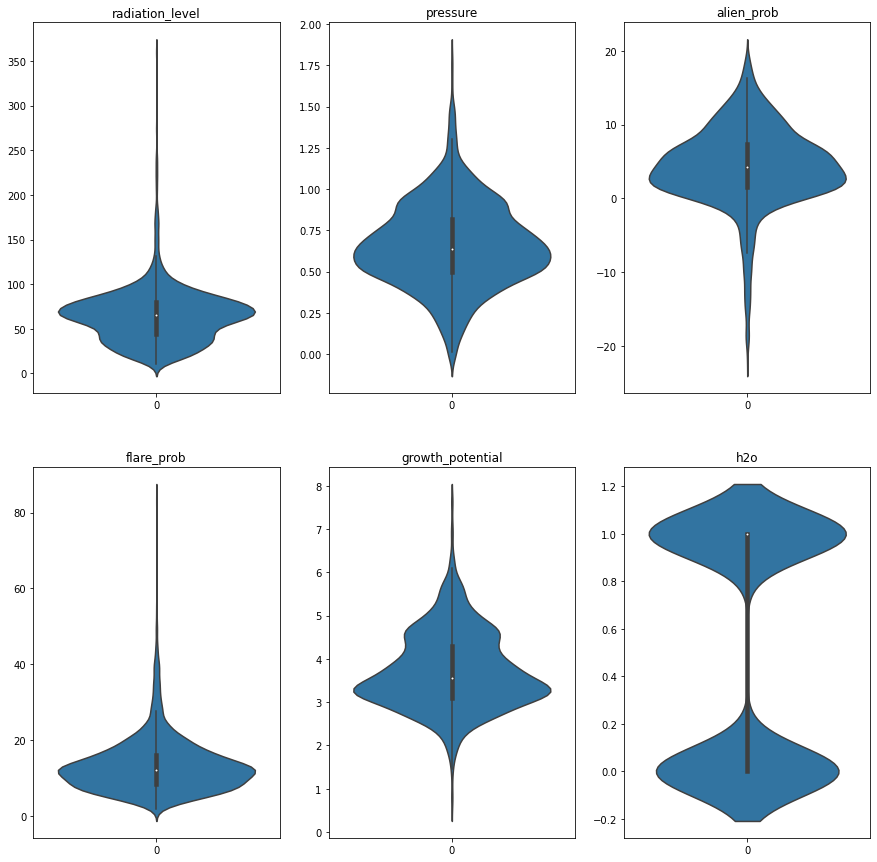

In [9]:
# Violen Plots of the Columns
fig, axs = plt.subplots(2, 3,figsize=(15,15))
row = 0
col = 0
for x in axs:
    row_position = 0
    if row == 0:
        col = 0
    else:
        col += 1
    x[row_position].title.set_text(data.columns[col])
    sns.violinplot(data=data[data.columns[col]], ax=x[0])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.violinplot(data=data[data.columns[col]], ax=x[1])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.violinplot(data=data[data.columns[col]], ax=x[2])
    row += 1

## Preprocessing

In [10]:
# String targets to integer values
data.loc[data['target'] == 'non_habitable', 'target'] = 0
data.loc[data['target'] == 'potentially_habitable', 'target'] = 1
data.loc[data['target'] == 'very_habitable', 'target'] = 2

Checking Feature importance by calculating score with SFS

First we drop the missing values and include the growth_potential column

After that we remove the growth_potential column 

In [11]:
data_filtered = data.dropna(how='any',axis=0)

X_filetered = data_filtered.iloc[:, 0:6]
y_filetered = data_filtered.iloc[:,6]
y_filetered=y_filetered.astype('int')


sc = StandardScaler()
sc.fit(X_filetered)
# Transform (standardise) both X_train and X_test with mean and STD from
# training data
X_filetered_std = sc.transform(X_filetered)

lr = LogisticRegression()

#knn = KNeighborsClassifier(n_neighbors=8)
# Create an SFS object
sfs = SFS(estimator=lr,       # Use logistic regression as our classifier
          k_features=(1, 6),  # Consider any feature combination between 1 and 4
          forward=True,       # Set forward to True when we want to perform SFS
          scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
          cv=5)               # The number of cross-validations to perform is 5

sfs = sfs.fit(X_filetered_std,y_filetered)

   # Print the results
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sfs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names 
                                                                  # that yield the best score

Best accuracy score: 0.86
Best subset (indices): (0, 1, 2, 3, 4, 5)
Best subset (corresponding names): ('0', '1', '2', '3', '4', '5')


In [12]:
data_drop = data.drop(data.columns[4], axis='columns')

In [13]:
X_filetered = data_drop.iloc[:, 0:5]
y_filetered = data_drop.iloc[:,5]
y_filetered=y_filetered.astype('int')


sc = StandardScaler()
sc.fit(X_filetered)
# Transform (standardise) both X_train and X_test with mean and STD from
# training data
X_filetered_std = sc.transform(X_filetered)

lr = LogisticRegression()

#knn = KNeighborsClassifier(n_neighbors=8)
# Create an SFS object
sfs = SFS(estimator=lr,       # Use logistic regression as our classifier
          k_features=(1, 5),  # Consider any feature combination between 1 and 4
          forward=True,       # Set forward to True when we want to perform SFS
          scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
          cv=5)               # The number of cross-validations to perform is 5

sfs = sfs.fit(X_filetered_std,y_filetered)

   # Print the results
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sfs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names 
                                                                  # that yield the best score

Best accuracy score: 0.84
Best subset (indices): (0, 1, 2, 3, 4)
Best subset (corresponding names): ('0', '1', '2', '3', '4')


We see that all the features were included in both cases for best score and with the growth_potential column the average was better.

So we are not removing any column.

In [14]:
data.head()

,radiation_level,pressure,alien_prob,flare_prob,growth_potential,h2o,target
0,57.500,0.410,9.300,14.9500,3.000,0,0
1,53.430,0.580,1.500,12.6850,2.900,0,0
2,65.375,0.460,3.922,13.4600,2.541,0,0
3,60.884,0.742,14.361,12.3385,NaN,0,0
4,72.625,0.968,3.323,9.3230,4.144,1,2


In [15]:
X = data.iloc[:, 0:6]
y = data.iloc[:,6]
y=y.astype('int')

In [16]:
X.head()

,radiation_level,pressure,alien_prob,flare_prob,growth_potential,h2o
0,57.500,0.410,9.300,14.9500,3.000,0
1,53.430,0.580,1.500,12.6850,2.900,0
2,65.375,0.460,3.922,13.4600,2.541,0
3,60.884,0.742,14.361,12.3385,NaN,0
4,72.625,0.968,3.323,9.3230,4.144,1


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    2
Name: target, dtype: int32

In [18]:
def make_submission_csv(clf, name_csv):
    data_test_final = pd.read_csv("test.csv")
    data_test_final = data_test_final.iloc[:, 0:6]
    test_pred_final = clf.predict(data_test_final)
    csv_data = {'Predicted':test_pred_final} 

    df = pd.DataFrame(csv_data) 
    df.index.name = 'Id'

    df.to_csv(name_csv)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

## Pipelines

We will define two pipelines.
One with Kernal Based classifier and second with regularization paramter.

### Kernal Based (SVM)

In [20]:
# Define the pipeline (scaling and classification method):
pipe_svc = make_pipeline(StandardScaler(),SimpleImputer(), SVC(random_state=1))

#Define ranges of parameter values:

c_range  = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] # For regularization parameter C.
gamme_range2 = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]         # For scaling parameter gamma og rbf-kernel.

strategies = ['mean', 'median', 'most_frequent', 'constant']

param_grid   = [{'svc__C': c_range, 'svc__kernel': ['linear'], 'simpleimputer__strategy':strategies},
                {'svc__C': c_range, 'svc__gamma': gamme_range2, 'svc__kernel': ['rbf'], 'simpleimputer__strategy':strategies}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=5,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

classifier = gs.best_estimator_
classifier.fit(X_train, y_train)

print('Test accuracy: %.3f' % classifier.score(X_test, y_test))

make_submission_csv(classifier,'submission_svm_new.csv')


0.8784687850278964
{'simpleimputer__strategy': 'most_frequent', 'svc__C': 100.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Test accuracy: 0.865


#### Confusion Matrix For SVM Pipeline

In [21]:
y_pred_svm = classifier.predict(X_test)
classifier = gs.best_estimator_
classifier.fit(X_train, y_train)
confmat_svm = confusion_matrix(y_true=y_test, y_pred=y_pred_svm)
print (confmat_svm)

[[237   1   1]
 [  2 112  24]
 [  1  38  82]]


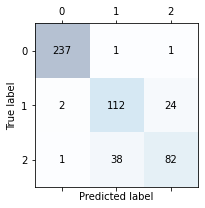

In [22]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat_svm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat_svm.shape[0]):
    for j in range(confmat_svm.shape[1]):
        ax.text(x=j, y=i, s=confmat_svm[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

### Regularization Based (LR)

In [24]:
#lr

pipe_lr = make_pipeline(StandardScaler(),SimpleImputer(), LogisticRegression(random_state=1))


c_range  = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] # For regularization parameter C.
strategies = ['mean', 'median', 'most_frequent', 'constant']
penalties = ['l1','l2','elasticnet']
solvers = ['lbfgs', 'sag','saga','newton-cg']
iters = [100,300,500,800,1000]

param_grid   = [{'logisticregression__C': c_range, 'logisticregression__penalty': penalties,'logisticregression__solver': solvers, 'logisticregression__max_iter': iters, 'simpleimputer__strategy':strategies}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=5,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)


classifier_lr = gs.best_estimator_
classifier_lr.fit(X_train, y_train)
print('Test accuracy: %.3f' % classifier_lr.score(X_test, y_test))

make_submission_csv(classifier_lr,'submission_lr_new.csv')

0.8568569665369454
{'logisticregression__C': 10.0, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs', 'simpleimputer__strategy': 'mean'}
Test accuracy: 0.841


#### Confusion Matrix For LR Pipeline

In [25]:
y_pred_lr = classifier_lr.predict(X_test)
confmat_lr = confusion_matrix(y_true=y_test, y_pred=y_pred_lr)
print (confmat_lr)

[[238   0   1]
 [  2 111  25]
 [  1  50  70]]


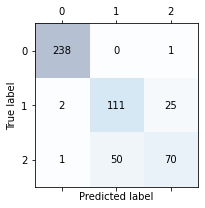

In [26]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat_lr, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat_lr.shape[0]):
    for j in range(confmat_lr.shape[1]):
        ax.text(x=j, y=i, s=confmat_lr[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

### ROC curve

In [27]:
# Coverting to Two Class
data_two_class = data.copy()
indexNames = data_two_class[ data_two_class['target'] == 1 ].index
data_two_class.drop(indexNames , inplace=True)
data_two_class.loc[data_two_class['target'] == 2, 'target'] = 1

In [28]:
X_twoCLass = data_two_class.iloc[:, 0:6]
y_twoCLass = data_two_class.iloc[:,6]
y_twoCLass=y_twoCLass.astype('int')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_twoCLass, y_twoCLass, test_size=0.2, stratify=y_twoCLass, random_state=1)

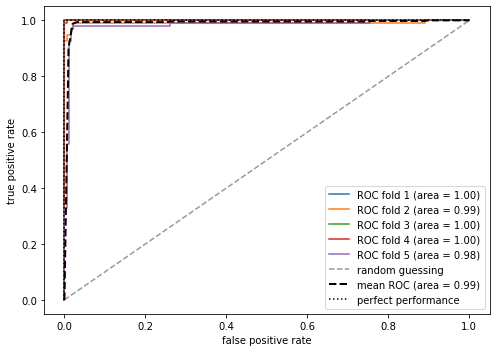

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from numpy import interp
cv = list(StratifiedKFold(n_splits=5).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

# Loop through folds of CV
for i, (train, test) in enumerate(cv):
    probas = classifier_lr.fit(X_train.iloc[train],
                         y_train.iloc[train]).predict_proba(X_train.iloc[test]) # Predict probability of classes

    # False Positive and True Positive Rates (thresholds for the decision function)
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test],
                                     probas[:, 1],
                                     pos_label=1)
    # Add to mean True Predictive Rate in a smoothed variant (interpolated)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

# Average True Positive Rate
mean_tpr /= len(cv)
mean_tpr[0] = 0.0
mean_tpr[-1] = 1.0
# Average AUC
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()